## GR5241 Group Project 

## Part 0: Environment Setup


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

sns.set_style('darkgrid')

%matplotlib inline

## Part 1: Import Data

In [47]:
#import red wine data, set color red equals to 1
red = pd.read_csv('/Users/ashleywu/Desktop/gr5241/Project/data/winequality-red.csv',sep=';')
red['color'] = 1 #redwine
print( red.shape)
red.head(5)

(1599, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [48]:
#import red wine data, set color white equals to 0
white= pd.read_csv('/Users/ashleywu/Desktop/gr5241/Project/data/winequality-white.csv',sep=';')
white['color'] = 0
print(white.shape)
white.head(5)

(4898, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [49]:
data = red.merge(white, how='outer')
data.head(10)
#fields = list(data.columns)
#print(fields)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


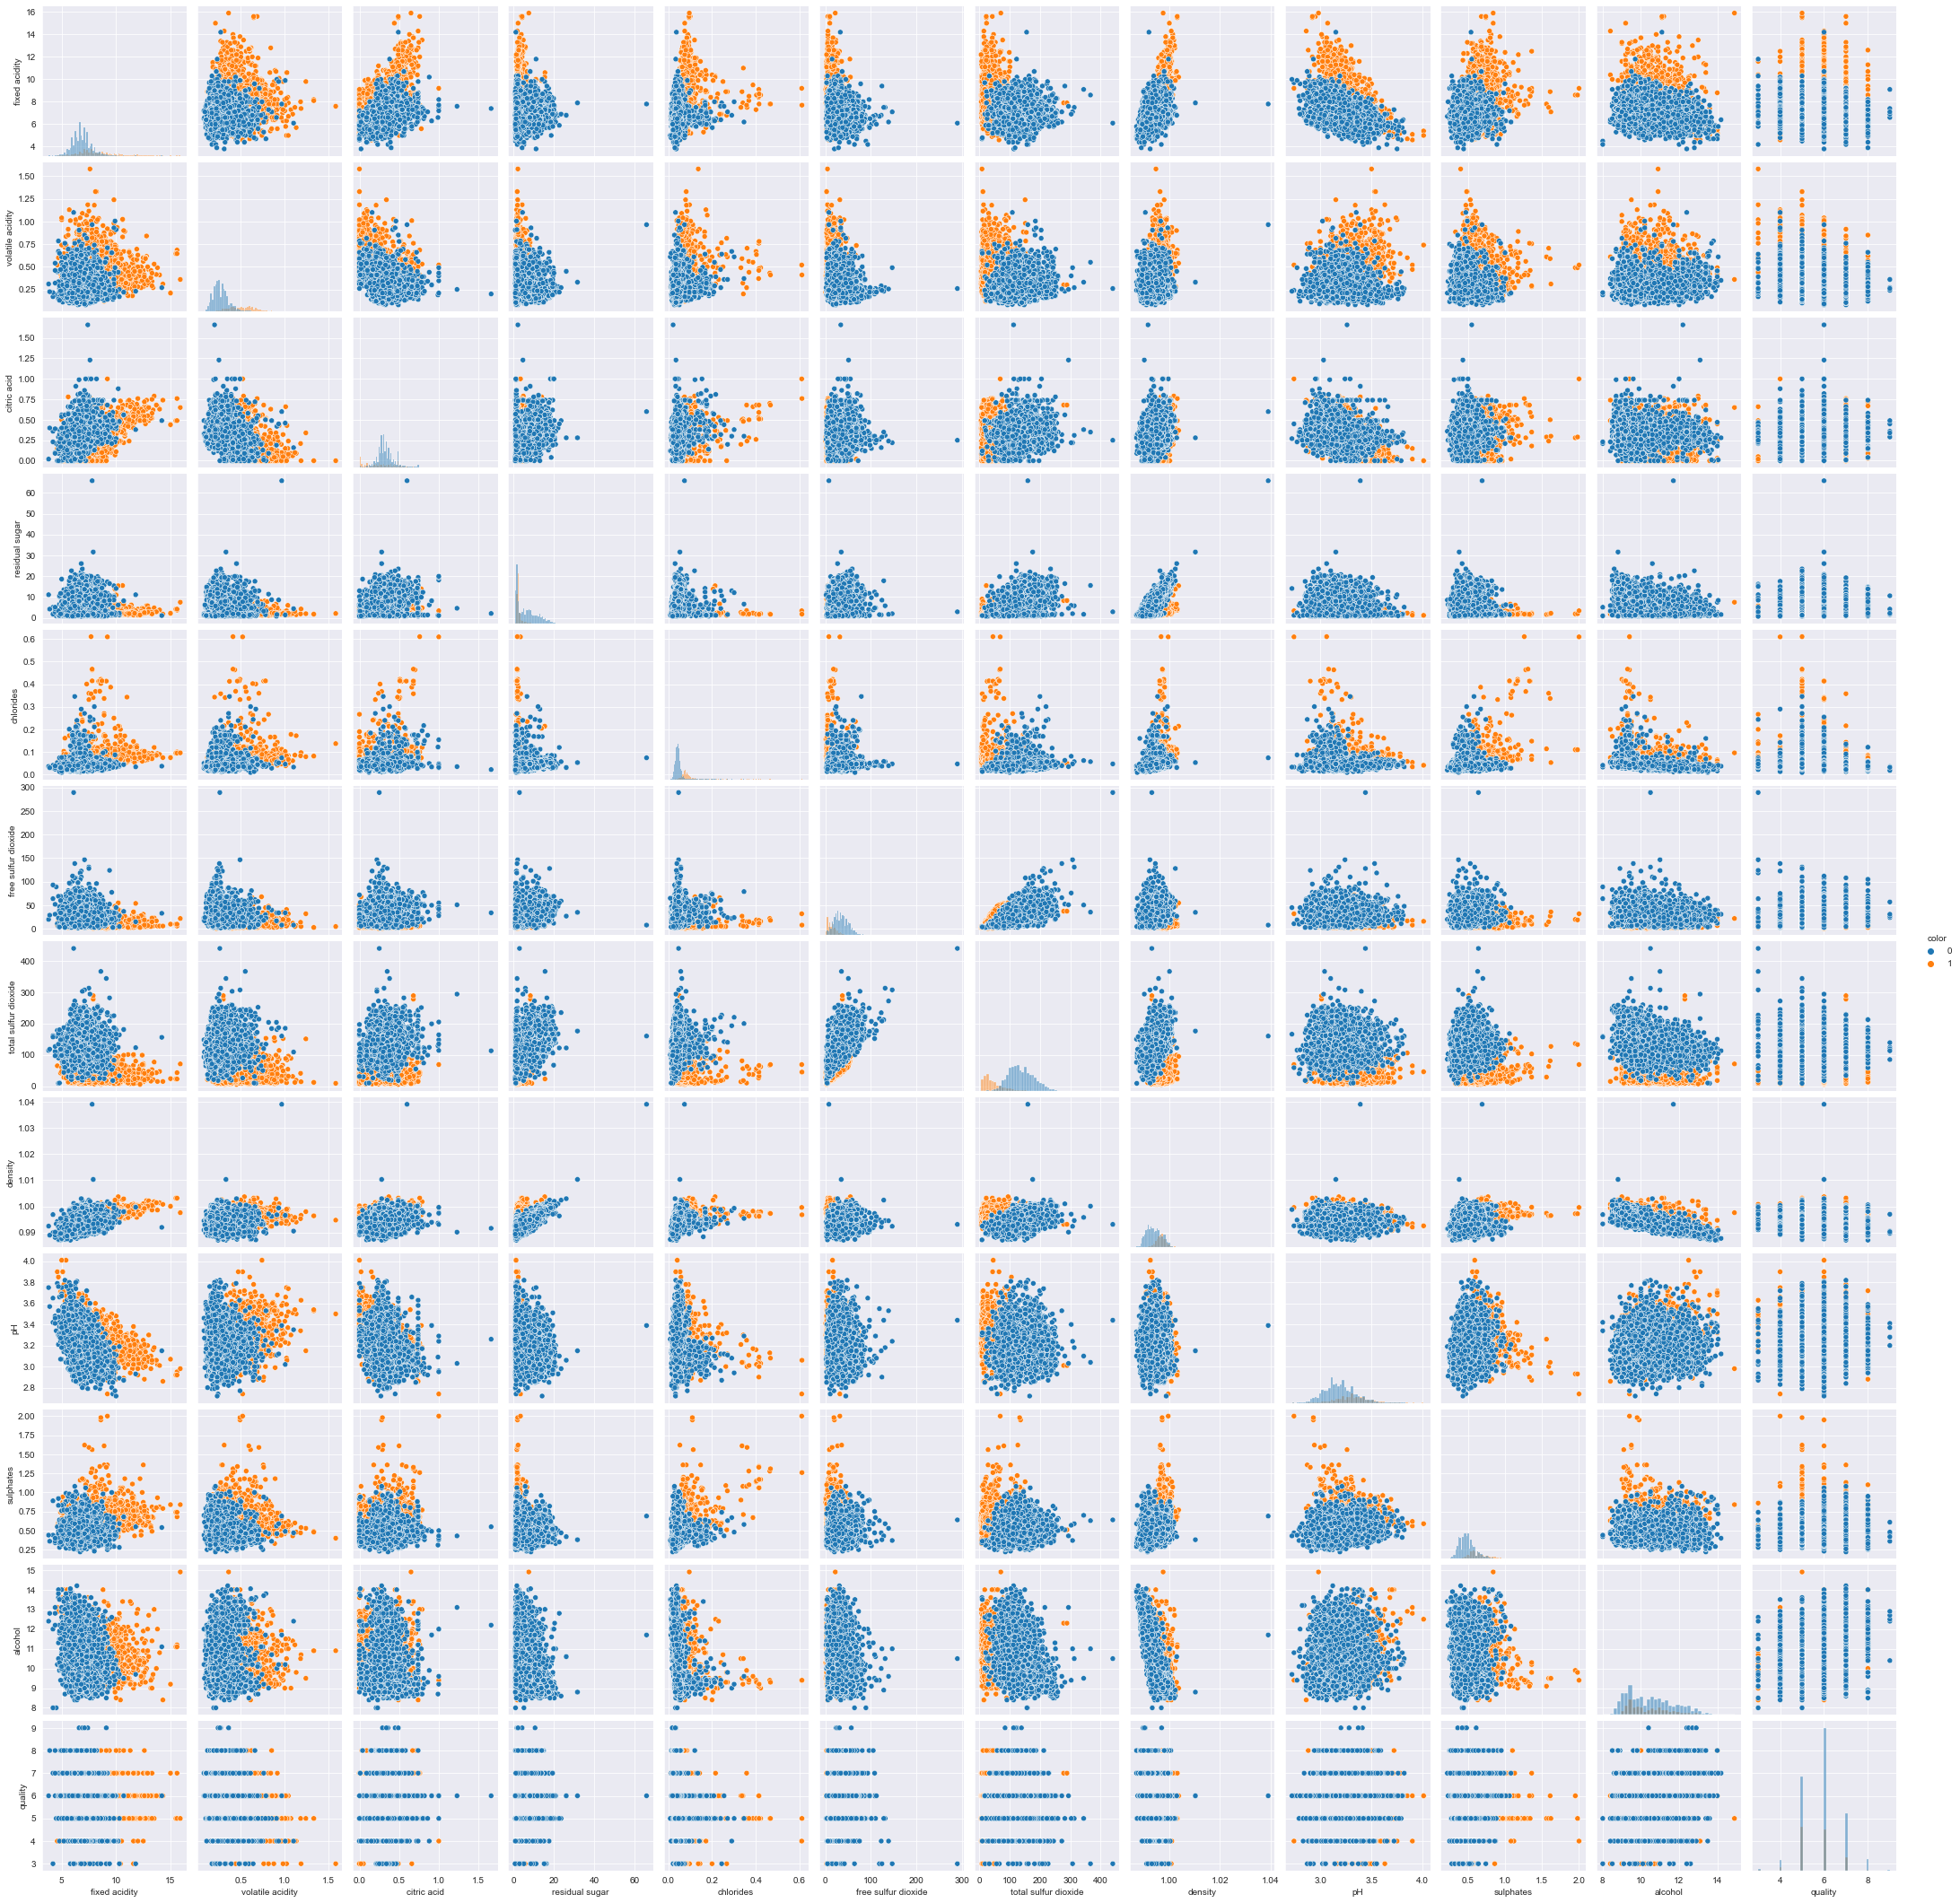

In [26]:
g = sns.pairplot(data, diag_kind='hist',hue='color')

## Part 3 Support Vector Machine (SVM)

- Use for: Classification and Regression

- Pros:
 - fast to evaluate
 - can use kernel trick to learn non-linear functions
- Cons:
 - slow to train
 - can fail to converge on very large datasets
<br>
<br>


In [50]:
from sklearn.preprocessing import MinMaxScaler

X = data[fields]
y = data['quality']

zscore = lambda x: (x-x.mean()) / x.std()
X_zscore = X.apply(zscore,axis=0)
y.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [86]:
#there is very low samples for wine qualities of 3,4,8,9 comparing with 5,6,7
#Therefore we only keep 5,6,7

from sklearn.preprocessing import MinMaxScaler


data = data.drop(data[data.quality == 9].index)
data = data.drop(data[data.quality == 3].index)
data = data.drop(data[data.quality == 8].index)
data = data.drop(data[data.quality == 4].index)

X = data[['fixed acidity','free sulfur dioxide']]
y = data['quality']

zscore = lambda x: (x-x.mean()) / x.std()
X_zscore = X.apply(zscore,axis=0)
y.value_counts().sort_index()

5    2138
6    2836
7    1079
Name: quality, dtype: int64

In [87]:
# OvR For Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(multi_class='ovr', # default
                          max_iter=1000      # to avoid errors
                         )
logr.fit(X_zscore,y)

print(logr.predict(X_zscore.iloc[[15,82,166]]))
print(logr.predict_proba(X_zscore.iloc[[15,82,166]]))

[6 6 6]
[[0.38800045 0.46120079 0.15079876]
 [0.36499818 0.45335069 0.18165113]
 [0.36066624 0.45483362 0.18450014]]


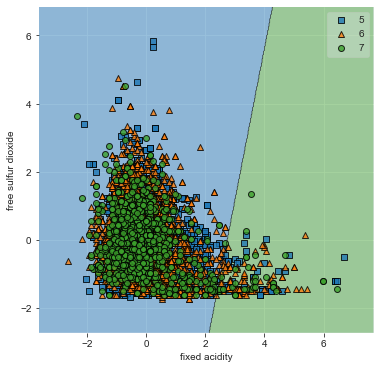

In [88]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X_zscore.values,y.values,logr)
ax.set_xlabel(X.columns[0]); ax.set_ylabel(X.columns[1]);

In [89]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Create a training and test/held-aside set
# Split into 80% train and 20% test using train_test_split 
# Use random_state=42 for reproducibility
# Save the result into the variables X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

/Users/ashleywu/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


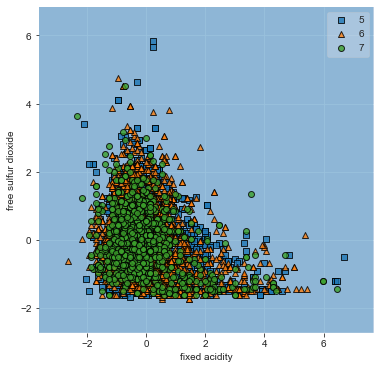

In [90]:
# SVM with sklearn
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_zscore,y);

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X_zscore.values, y.values, clf=svm_linear);
plt.xlabel(X.columns[0]); plt.ylabel(X.columns[1]);

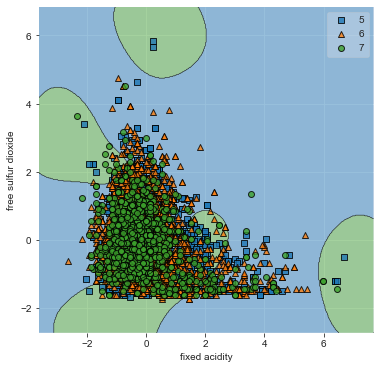

In [91]:
# SVM Kernel Trick with RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_zscore,y);

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X_zscore.values, y.values, clf=svm_rbf);
plt.xlabel(X.columns[0]); plt.ylabel(X.columns[1]);